In [1]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

from config import *
from main import run_trajectory, update_final_layer, update_embedding_size
from simple_decoder_transformer import SimpleDecoderTransformer
from competiclique_the_game import CompetiClique

from copy import deepcopy

builder_states = torch.load("builder_policy_opt.pt")
forbidder_states = torch.load("forbidder_policy_opt.pt")

device = torch.device(DEVICE)

model = SimpleDecoderTransformer(L=LAYERS, H=HEADS, d_e=EMBEDDING_DIM, d_mlp = MLP_DIM, n_tokens=N_TOKENS, n_positions=POSITIONS, n_out=N_OUT).to(device)

game = CompetiClique()

builder_policy = deepcopy(model)#SimpleDecoderTransformer(L = 2, H = 4, d_e = 32, d_mlp = 48)
forbidder_policy = deepcopy(model)#SimpleDecoderTransformer(L = 2, H = 4, d_e = 32, d_mlp = 48)

In [2]:
builder_states['builder_policy_state_dict'].keys()

odict_keys(['vertex_embedding.weight', 'position_embedding.weight', 'trunk.0.0.weight', 'trunk.0.0.bias', 'trunk.0.1.in_proj_weight', 'trunk.0.1.in_proj_bias', 'trunk.0.1.out_proj.weight', 'trunk.0.1.out_proj.bias', 'trunk.0.2.weight', 'trunk.0.2.bias', 'trunk.0.3.weight', 'trunk.0.3.bias', 'trunk.0.5.weight', 'trunk.0.5.bias', 'trunk.1.0.weight', 'trunk.1.0.bias', 'trunk.1.1.in_proj_weight', 'trunk.1.1.in_proj_bias', 'trunk.1.1.out_proj.weight', 'trunk.1.1.out_proj.bias', 'trunk.1.2.weight', 'trunk.1.2.bias', 'trunk.1.3.weight', 'trunk.1.3.bias', 'trunk.1.5.weight', 'trunk.1.5.bias', 'trunk.2.0.weight', 'trunk.2.0.bias', 'trunk.2.1.in_proj_weight', 'trunk.2.1.in_proj_bias', 'trunk.2.1.out_proj.weight', 'trunk.2.1.out_proj.bias', 'trunk.2.2.weight', 'trunk.2.2.bias', 'trunk.2.3.weight', 'trunk.2.3.bias', 'trunk.2.5.weight', 'trunk.2.5.bias', 'trunk.3.0.weight', 'trunk.3.0.bias', 'trunk.3.1.in_proj_weight', 'trunk.3.1.in_proj_bias', 'trunk.3.1.out_proj.weight', 'trunk.3.1.out_proj.bias'

In [3]:
#builder_policy.load_state_dict(builder_states['builder_policy_state_dict'])
forbidder_policy.load_state_dict(forbidder_states['forbidder_policy_state_dict'])

print()

In [4]:
training_stats = builder_states['training_stats']
builder_discounted_return = [batch_stats['average_builder_return'] for batch_stats, eval_stats in training_stats]
forbidder_discounted_return = [batch_stats['average_forbidder_return'] for batch_stats, eval_stats in training_stats]

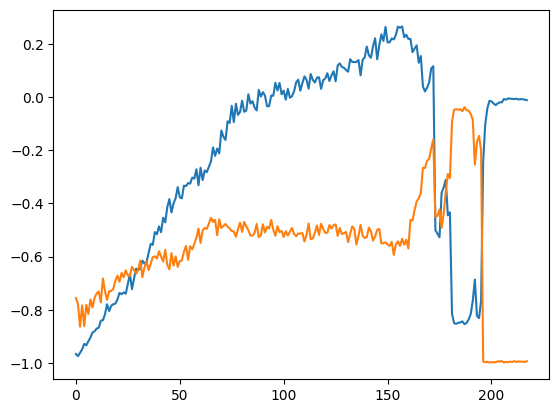

In [5]:
plt.plot(range(len(builder_discounted_return)), builder_discounted_return)
plt.plot(range(len(forbidder_discounted_return)), forbidder_discounted_return)

nobody_wins
2
clique size goal = 3
edges per builder turn = 1
vertices per forbidder turn = 1


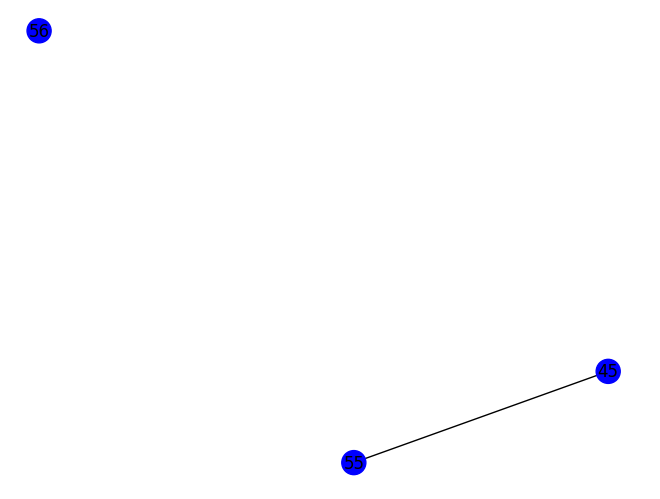

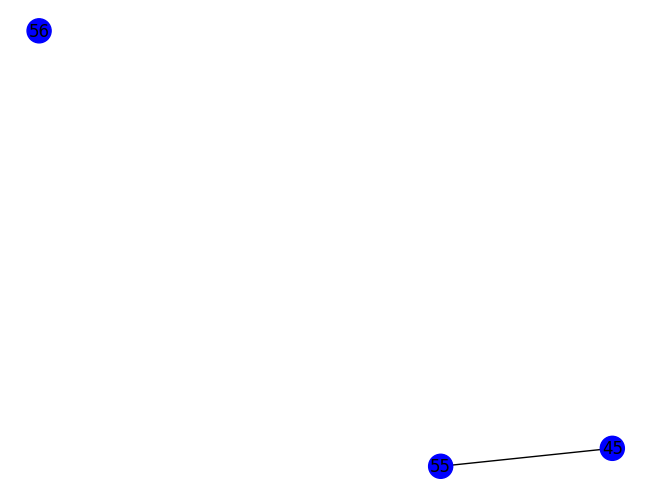

In [6]:
trajectory = None
with torch.no_grad():
    trajectory = run_trajectory(game, builder_policy, forbidder_policy, device, evalu=True)
print(trajectory[-1])
print(trajectory[-5])
print("clique size goal =", game.K)
print("edges per builder turn =", game.M)
print("vertices per forbidder turn =", game.N)

for graph in trajectory[-2]:
    color_map = list('red' if graph.nodes[node]['forbidden'] else 'blue' for node in graph)
    nx.draw(graph, node_color=color_map, with_labels=True)
    plt.show()

In [7]:
trajectory

(deque([tensor([[0.0068, 0.0070, 0.0057, 0.0045, 0.0091, 0.0056, 0.0061, 0.0052, 0.0162,
                 0.0064, 0.0105, 0.0018, 0.0056, 0.0098, 0.0284, 0.0062, 0.0224, 0.0073,
                 0.0124, 0.0035, 0.0043, 0.0035, 0.0069, 0.0057, 0.0089, 0.0040, 0.0106,
                 0.0036, 0.0099, 0.0063, 0.0109, 0.0070, 0.0153, 0.0117, 0.0269, 0.0077,
                 0.0110, 0.0082, 0.0077, 0.0083, 0.0093, 0.0086, 0.0291, 0.0103, 0.0049,
                 0.0128, 0.0165, 0.0071, 0.0036, 0.0051, 0.0055, 0.0184, 0.0098, 0.0206,
                 0.0064, 0.0203, 0.0024, 0.0042, 0.0101, 0.0064, 0.0021, 0.0181, 0.0137,
                 0.0085, 0.0112, 0.0150, 0.0030, 0.0041, 0.0072, 0.0143, 0.0055, 0.0055,
                 0.0136, 0.0144, 0.0031, 0.0188, 0.0210, 0.0020, 0.0207, 0.0182, 0.0052,
                 0.0045, 0.0083, 0.0045, 0.0092, 0.0187, 0.0076, 0.0153, 0.0074, 0.0036,
                 0.0037, 0.0036, 0.0149, 0.0090, 0.0063, 0.0064, 0.0080, 0.0086, 0.0052,
                 0.02